# Enron Email Analysis

## Analysis 3
Analysis top10 business related topic and export a plot by date
Show how the Enron fall into business crisis

In [53]:
import nltk
import os
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

In [54]:
#functions to remove punctuation, numbers, empty content and stop words
def remove_punctuation(words_list):
    words_noPunc = []
    words_punc = string.punctuation
    for word in words_list:
        buffer = 0
        for subword in word:
            if subword in words_punc:
                buffer += 1
        if buffer==0:
            words_noPunc.append(word)
    return words_noPunc
def remove_int(words_list):
    words_noInt = [word for word in words_list if not any(x.isdigit() for x in word)]
    return words_noInt
def remove_empty(words_list):
    words_noEmpty = []
    for word in words_list:
        if word != '':
            words_noEmpty.append(word)
    return words_noEmpty
def remove_stop(words_list):
    cachedStopWords = stopwords.words("english")
    words_noStop = [word for word in words_list if word not in cachedStopWords]
    return words_noStop
def get_month(mon):
    options={'Jan':1, 'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    if mon in options.keys():
        return options[mon]
    else:
        return '0'

In [55]:
#define local path
path_local = '/Users/lisha/Desktop/INFO7374_PythonIntro_Exam/Midterm/data/'
path_dir = path_local + 'maildirTest' 

In [56]:
#get all the directories of all files
list_dir = []
for path, subdirs, files in os.walk(path_dir):
    for name in files:
        list_dir.append(os.path.join(path, name))

In [57]:
print(list_dir[:3])

['/Users/lisha/Desktop/INFO7374_PythonIntro_Exam/Midterm/data/maildirTest/.DS_Store', '/Users/lisha/Desktop/INFO7374_PythonIntro_Exam/Midterm/data/maildirTest/.DS_Store.bak', '/Users/lisha/Desktop/INFO7374_PythonIntro_Exam/Midterm/data/maildirTest/allen-p/.DS_Store']


In [58]:
#Top 10 topics related to the process of core business
list_topic = ['enron','deal','agreement','chang','contract','corp','fax','houston','date','america']

In [59]:
#Get all email content by date format year month(eg. 201703)
dic_date = {}
for item in list_dir:
    if '.DS_Store' not in item:
        searchfile = open(item, encoding = "ISO-8859-1")
        for line in searchfile:
            line_temp = []
            line_new = ''
            if line[:5] == 'Date:':            
                line_new = line.strip()
                line_temp = line_new.split(' ')
                if len(line_temp)==8:
                    month = get_month(line.split(' ')[3])
                    year = line.split(' ')[4]
                else:
                    x=0
                if len(str(month))<= 1 :
                    year_month = year + str(0) + str(month)
                else:
                    year_month = year + str(month)
                if int(year) >= 1998:
                    if int(year)<=2003:
                        lines=''
                        for line1 in searchfile:
                            for word in list_topic:
                                if word in line1:
                                    if year_month not in dic_date.keys():
                                        dic_date[year_month] = 1
                                    else:
                                        dic_date[year_month] += 1                                      
        searchfile.close()

In [60]:
print(dic_date)

{'200105': 15419, '200010': 14640, '200008': 11806, '200007': 8405, '200009': 8972, '200104': 15341, '200006': 7935, '200005': 6910, '200004': 7568, '200003': 8249, '200002': 6730, '200001': 7095, '199912': 2384, '200103': 15187, '200102': 10631, '200012': 24473, '200101': 18580, '200011': 31114, '200112': 7174, '200110': 15228, '200108': 2271, '200111': 12507, '200201': 12889, '200109': 1373, '200106': 5636, '200107': 1015, '200202': 4450, '199911': 12}


In [61]:
year = []
frequency = []
for key in dic_date.keys():
    year.append(key)
    frequency.append(dic_date[key]/10000)

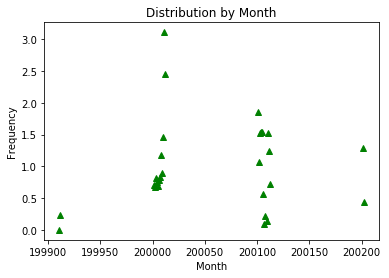

In [64]:
plt.plot(year,frequency,'g^')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution by Month')
plt.savefig('plot_distribution.jpg')
plt.show()

In [65]:
print('The distribution of top10 key topic indicates the acivity of business.')
print('The business dorp down obviously after 2001 which is the same status as status of Enron.')

The distribution of top10 key topic indicates the acivity of business.
The business dorp down obviously after 2001 which is the same status as status of Enron.
